In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle as pk
from scipy import special


def load_pk(path):
    with open(path, 'rb') as f:
        x = pk.load(f)
    return x

path = ''




In [7]:
# plot a function of the three dimensions of the spline

def spline(sigma, r, length=1, eps=0.0):
    r = np.where(r < -length *0.25, -length**2/(8.*(length + 2.*r)+eps), r)
    r = np.where(r > 0.25*length, length**2/(8.*(length - 2.*r)-eps), r)
    return np.exp(-np.linalg.norm(sigma @ r))

def apply_minimum_image_convention(displacement_vectors, unit_cell_length=1.):
    displace = (2. * displacement_vectors / unit_cell_length).astype(int).astype(displacement_vectors.dtype) * unit_cell_length
    displacement_vectors = displacement_vectors - displace
    return displacement_vectors

def keep_in_boundary(walkers, real_basis, inv_real_basis):
    talkers = walkers.dot(inv_real_basis)
    talkers = np.fmod(talkers, 1.)
    talkers = np.where(talkers < 0., talkers + 1., talkers)
    talkers = talkers.dot(real_basis)
    return talkers

def isotropic(sigma, distance):
    return np.exp(-sigma * distance)

def iso_spline(sigma, distance, length=1.):
    return isotropic(sigma, distance) + isotropic(sigma, length-distance) - 2*isotropic(sigma, length/2.)

real_basis = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
inv_real_basis = np.linalg.inv(real_basis)

X = np.linspace(-1, 2., 1000)
r0 = np.array([[0.0],[0.25],[0.0]])
sigma = np.random.rand(3, 3)
sigma = sigma @ np.transpose(sigma)
iso_sigma = np.random.uniform(0, 1)
eps = 0.01

data = []
for x in X:
    r1 = np.array([[0.0],[x],[0.0]])
    r1 = keep_in_boundary(r1.T, real_basis, inv_real_basis).T
    r = r0 - r1 
    r = apply_minimum_image_convention(r)
    r_pre_sin = r[1]
    r_sin_y = np.sin(2*np.pi*r)[1]
    distance = np.linalg.norm(r, axis=0)[0]
    
    # anisotropic
    y = np.exp(-np.linalg.norm(sigma @ r))
    y_eps0 = spline(sigma, r)
    y_eps = spline(sigma, r, eps=eps)

    # isotropic
    iso_y = isotropic(iso_sigma, distance)
    iso_periodic = iso_spline(iso_sigma, distance)

    tmp = [x, r1[1], r_pre_sin, r_sin_y, distance, y, y_eps0, y_eps, iso_y, iso_periodic]
    
    data.append(tmp)
                          
names = ['x', 'x_mic', 'r_pre_sin', 'r_sin_y', 'distance', 'orb', 'orb_eps0', 'orb_eps%.3f' % eps, 'iso_y', 'iso_spline']
data = pd.DataFrame(data=data, columns=names)
print(data)


            x                    x_mic              r_pre_sin  \
0   -1.000000                    [0.0]                 [0.25]   
1   -0.996997  [0.0030030030030030463]  [0.24699699699699695]   
2   -0.993994   [0.006006006006005982]  [0.24399399399399402]   
3   -0.990991   [0.009009009009009028]  [0.24099099099099097]   
4   -0.987988   [0.012012012012011963]  [0.23798798798798804]   
..        ...                      ...                    ...   
995  1.987988     [0.9879879879879878]   [0.2620120120120122]   
996  1.990991     [0.9909909909909911]   [0.2590090090090089]   
997  1.993994     [0.9939939939939939]   [0.2560060060060061]   
998  1.996997     [0.9969969969969972]   [0.2530030030030028]   
999  2.000000                    [0.0]                 [0.25]   

                  r_sin_y  distance       orb  orb_eps0  orb_eps0.010  \
0                   [1.0]  0.250000  0.646121  0.646121      0.646121   
1    [0.9998219965624732]  0.246997  0.649520  0.649520      0.649520   


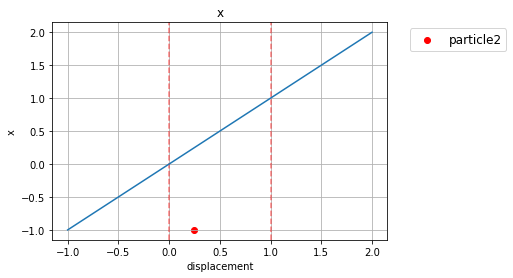

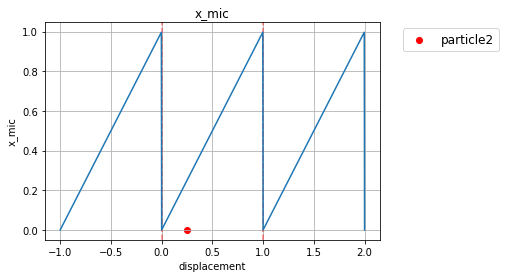

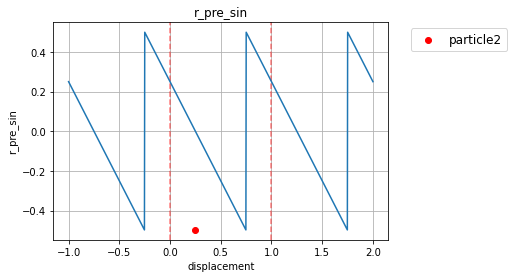

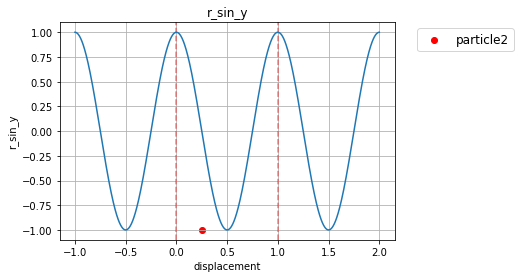

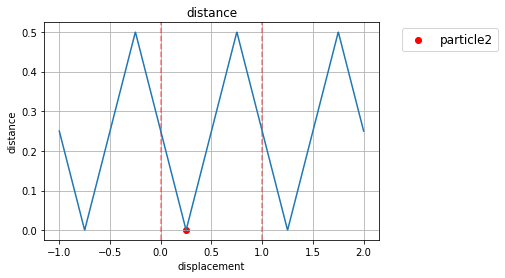

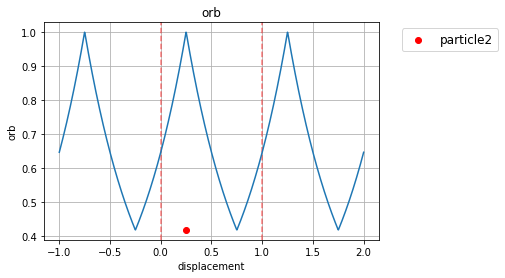

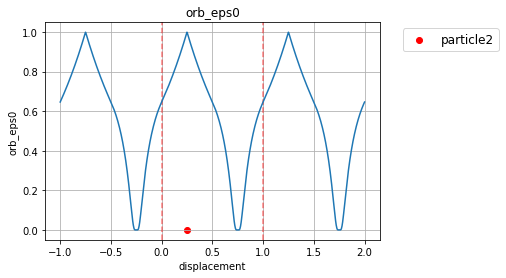

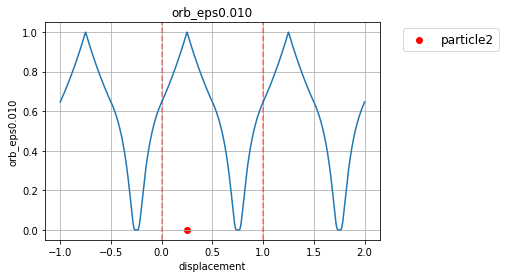

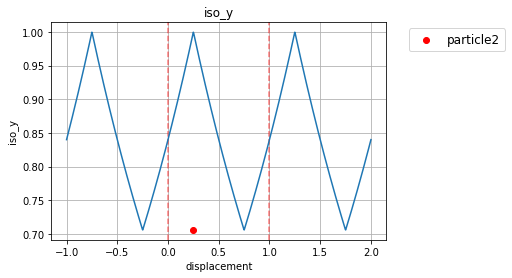

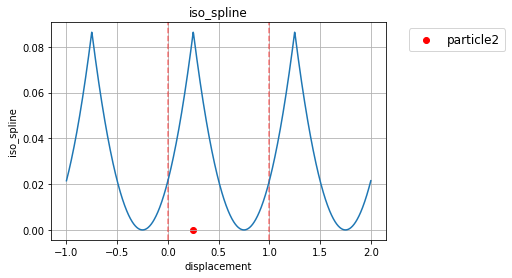

In [8]:
def pretty_base(title=None, 
                xaxis=None, 
                yaxis=None, 
                xlims=None, 
                ylims=None,
                legend=None,
                figsize=(4,4),
                xlines=[],
                ylines=[]):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}

    ax.set_title(title) #, **csfont)
    ax.set_xlabel(xaxis) #, **hfont)
    ax.set_ylabel(yaxis)
    if legend is None:
        pass
    elif legend is 'outside':
        ax.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    elif legend is 'inside':
        ax.legend(fontsize=12)
    if xlims is not None: ax.set_xlim(xlims) 
    if ylims is not None: ax.set_ylim(ylims)
    ax.grid(b=True, which='major', axis='both')
    [ax.axhline(y=x, ls='--') for x in xlines]
    [ax.axvline(x=y, ls='--', alpha=0.5, color='r') for y in ylines]
    return fig, ax
    
for name in names:
    fig, ax = pretty_base(title=name, yaxis=name, xaxis='displacement', figsize=(6,4), ylines=[0.0, 1.])
    ax.scatter([0.25], [np.min(data[name])], label='particle2', color='red')
    ax.plot(X, data[name])
    ax.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')



/home/amawi/.conda/envs/xmax/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/amawi/.conda/envs/xmax/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


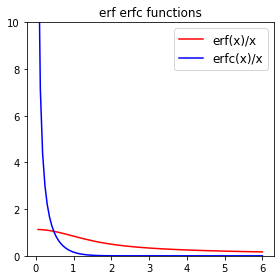

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
if type(axs) is list:
    axs = [ax for lst in axs for ax in lst]

X = np.linspace(0, 6, 100)

Yerf = special.erf(X) / X
Yerfc = special.erfc(X) / X

axs.plot(X, Yerf, color='r', label='erf(x)/x')

axs.plot(X, Yerfc, color='b', label='erfc(x)/x')

decorate(axs, title='erf erfc functions', ylims=(0, 10))

fig.tight_layout()

axs.legend(fontsize=12)

plt.show()

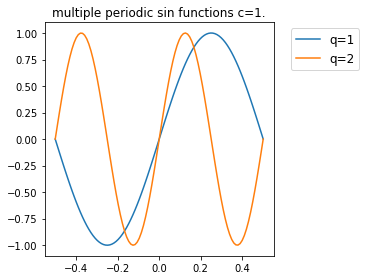

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
if type(axs) is list:
    axs = [ax for lst in axs for ax in lst]

X = np.linspace(-0.5, 0.5, 100)

for q in range(1, 3):
    Y = np.sin(q * 2 * np.pi * X)
    axs.plot(X, Y, label='q=%i' % q)

decorate(axs, title='multiple periodic sin functions c=1.')

fig.tight_layout()

axs.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()